# DTSA 5509 - Supervised Machine Learning - Final Project: Microsoft Stock Prices From 2000 - 2023.

The following dataset is from Kaggle (https://www.kaggle.com/datasets/prajwaldongre/microsoft-stock-price2000-2023/data) and represents the Microsoft Stock Price form 2000 - 2023. The data is split into the following columns (copied directly from Kaggle):

* Date: This column represents the calender date when the data about the stock is recorded.

* Open: This column represents the first recorded price of the stock for a trading session.

* High: The high price represents the highest traded price of the stock during a given trading session. It reflects the peak value that the stock reached during the day.

* Low: The low price is the lowest traded price of the stock during a specific trading session. It indicates the minimum value that the stock reached during the day.

* Close: The closing price is the last traded price of the stock at the end of a trading session. It reflects the final value at which the stock was traded before the market closes.

* Adj Close(Adjusted Close): The adjusted closing price accounts for corporate actions, such as dividends, stock splits, and new stock offerings, that may affect the stock's price but are not directly related to its performance. The adjusted close is often used to assess the stock's performance over time.

* Volume: Volume represents the total number of shares traded during a specific time period. It gives an indication of the level of market activity and liquidity for that stock. High volume often suggests increased investor interest, while low volume may indicate less active trading.

This project is to examine how Supervised Machine Learning Models can help predict beneficial information to an investor in Microsoft Stock by examining how to predict closing prices and positive/negative returns. 

In [1]:
# Math Libraries:
import pandas as pd
import numpy as np

# Sklearn Model Libraries:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc

# Stats Models:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Visualization:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create Dataframe from the downloaded CSV file. 
df = pd.read_csv('/Users/samshade/Downloads/MSFT(2000-2023).csv')

## Exploratory Data Analysis (EDA) and Data Cleaning

The steps below are utilized to better understand the dataset, and how each of the columns in the dataframe correlate with each other. 

In [3]:
# Inspect the top 5 rows of the dataframe.
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2000,58.68750,59.3125,56.00000,58.28125,36.132248,53228400
1,1/4/2000,56.78125,58.5625,56.12500,56.31250,34.911709,54119000
2,1/5/2000,55.56250,58.1875,54.68750,56.90625,35.279816,64059600
3,1/6/2000,56.09375,56.9375,54.18750,55.00000,34.098019,54976600
4,1/7/2000,54.31250,56.1250,53.65625,55.71875,34.543629,62013600


In [4]:
# Inspect the bottom 5 rows of the dataframe. 
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6007,11/16/2023,370.959991,376.350006,370.179993,376.170013,376.170013,27182300
6008,11/17/2023,373.609985,374.369995,367.000000,369.850006,369.850006,40157000
6009,11/20/2023,371.220001,378.869995,371.000000,377.440002,377.440002,52465100
6010,11/21/2023,375.670013,376.220001,371.119995,373.070007,373.070007,28423100
6011,11/22/2023,378.000000,379.790009,374.970001,377.850006,377.850006,23345300


In [5]:
# Inspect the column datatypes and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6012 non-null   object 
 1   Open       6012 non-null   float64
 2   High       6012 non-null   float64
 3   Low        6012 non-null   float64
 4   Close      6012 non-null   float64
 5   Adj Close  6012 non-null   float64
 6   Volume     6012 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 328.9+ KB


In [6]:
# Change the 'Date' column to DateTime datatype.
df['Date'] = pd.to_datetime(df['Date']) 

In [7]:
# Make category 'Returns' that indicates whether a closing price will increase (1) or decrease (0) in the next time step
df['Returns'] = (df['Close'].shift(-1) > df['Close']).astype(int)

In [8]:
# Look at common descriptive statistics (mean, std, quartlies, count, min, max, etc.)
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Returns
count,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6.012000e+03,6012.000000
mean,77.767658,78.582541,76.941528,77.786900,70.789050,5.132949e+07,0.506321
std,87.008302,87.897979,86.087633,87.036507,88.438452,3.074841e+07,0.500002
min,15.200000,15.620000,14.870000,15.150000,11.304623,7.425600e+06,0.000000
25%,27.030001,27.299999,26.807499,27.049999,19.027981,2.865732e+07,0.000000
50%,32.550001,32.997500,32.187500,32.635000,23.633584,4.605860e+07,1.000000
75%,84.222498,84.727497,83.497500,84.192499,78.474423,6.504930e+07,1.000000
max,378.000000,379.790009,374.970001,377.850006,377.850006,5.910522e+08,1.000000


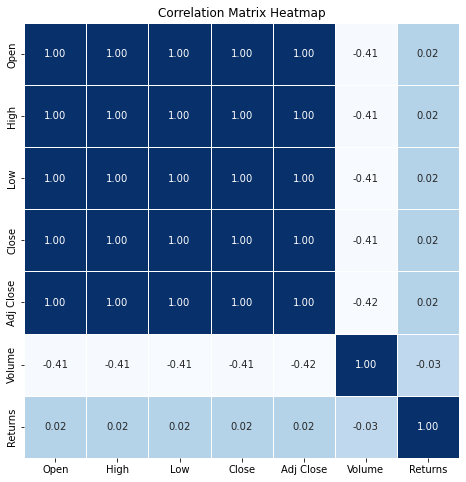

In [9]:
# Visualize the correlation of features
conf_mat = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", cbar=False, linewidths=0.5, fmt=".2f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

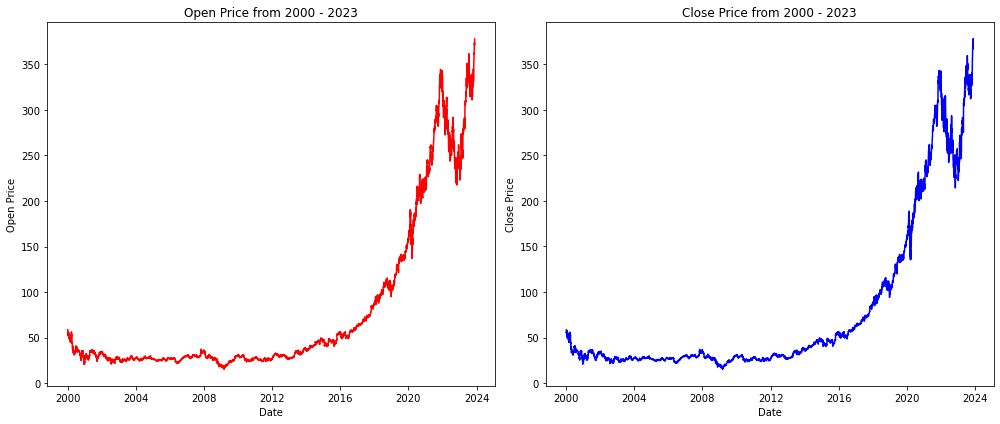

In [10]:
# Look at overall performance of the stock over the time period and how 'Open' and 'Close' visually relate.

# Create the subplots.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot 'Open' Price.
ax1.plot(df['Date'], df['Open'], color='red', label='Open Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Open Price')
ax1.set_title('Open Price from 2000 - 2023')

# Plot 'Close' Price.
ax2.plot(df['Date'], df['Close'], color='blue', label='Close Price')
ax2.set_xlabel('Date')
ax2.set_ylabel('Close Price')
ax2.set_title('Close Price from 2000 - 2023')

# Adjust the layout to prevent clipping of titles.
plt.tight_layout()

# display the plots
plt.show()

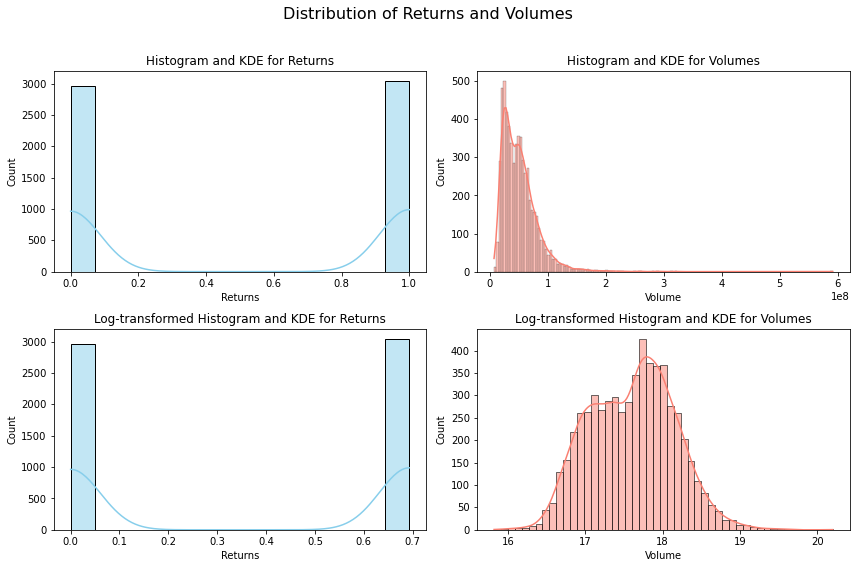

In [11]:
# Next, plot the distribution of returns and volumes via Histograms and Kernel Density Plots.

returns = df['Returns']
volume = df['Volume']

# Set up the subplots.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Distribution of Returns and Volumes', fontsize=16)

# Plot the Histogram and KDE for Returns
sns.histplot(returns, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Histogram and KDE for Returns')

# Plot the Histogram and KDE for Volumes
sns.histplot(volume, kde=True, color='salmon', ax=axes[0, 1])
axes[0, 1].set_title('Histogram and KDE for Volumes')

# Plot the log-transformed Histogram and KDE for Returns 
sns.histplot(returns.apply(lambda x: max(x, 1e-10)).apply(np.log1p), kde=True, color='skyblue', ax=axes[1, 0])
axes[1, 0].set_title('Log-transformed Histogram and KDE for Returns')

# Plot the log-transformed Histogram and KDE for Volumes 
sns.histplot(volume.apply(lambda x: max(x, 1e-10)).apply(np.log1p), kde=True, color='salmon', ax=axes[1, 1])
axes[1, 1].set_title('Log-transformed Histogram and KDE for Volumes')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

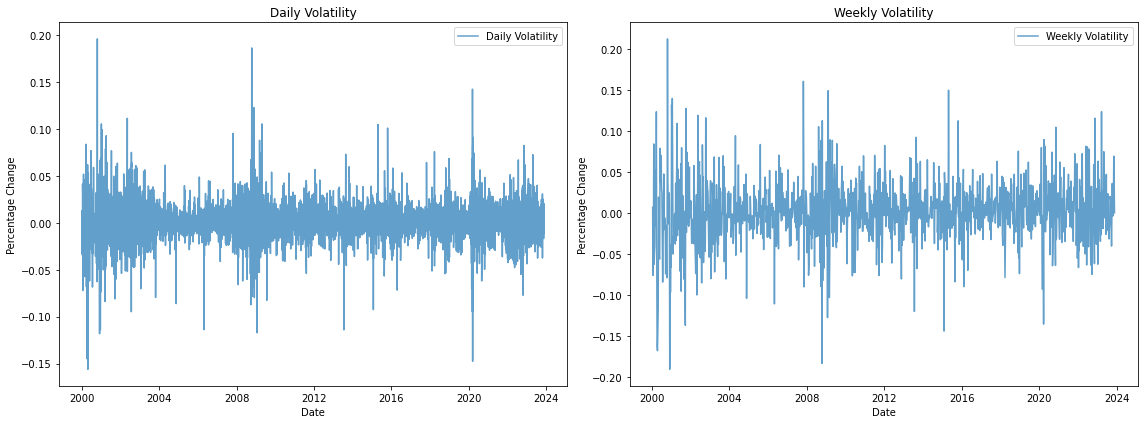

In [12]:
# Next, examine overall Volatility (weekly and daily) of stocks
df.set_index('Date', inplace=True)

# Calculate daily percentage change of closing prices from last time step.
df['Daily_Return'] = df['Close'].pct_change()

# Calculate weekly percentage change in closing prices from last time step.
df['Weekly_Return'] = df['Close'].resample('W-Fri').ffill().pct_change()

# Create side-by-side plots for daily and weekly volatility
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot for daily volatility
sns.lineplot(x=df.index, y=df['Daily_Return'], label='Daily Volatility', alpha=0.7, ax=axes[0])
axes[0].set_title('Daily Volatility')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Percentage Change')

# Plot for weekly volatility
sns.lineplot(x=df.resample('W-Fri').mean().index, y=df.resample('W-Fri').mean()['Weekly_Return'], label='Weekly Volatility', alpha=0.7, ax=axes[1])
axes[1].set_title('Weekly Volatility')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Percentage Change')

plt.tight_layout()
plt.show()

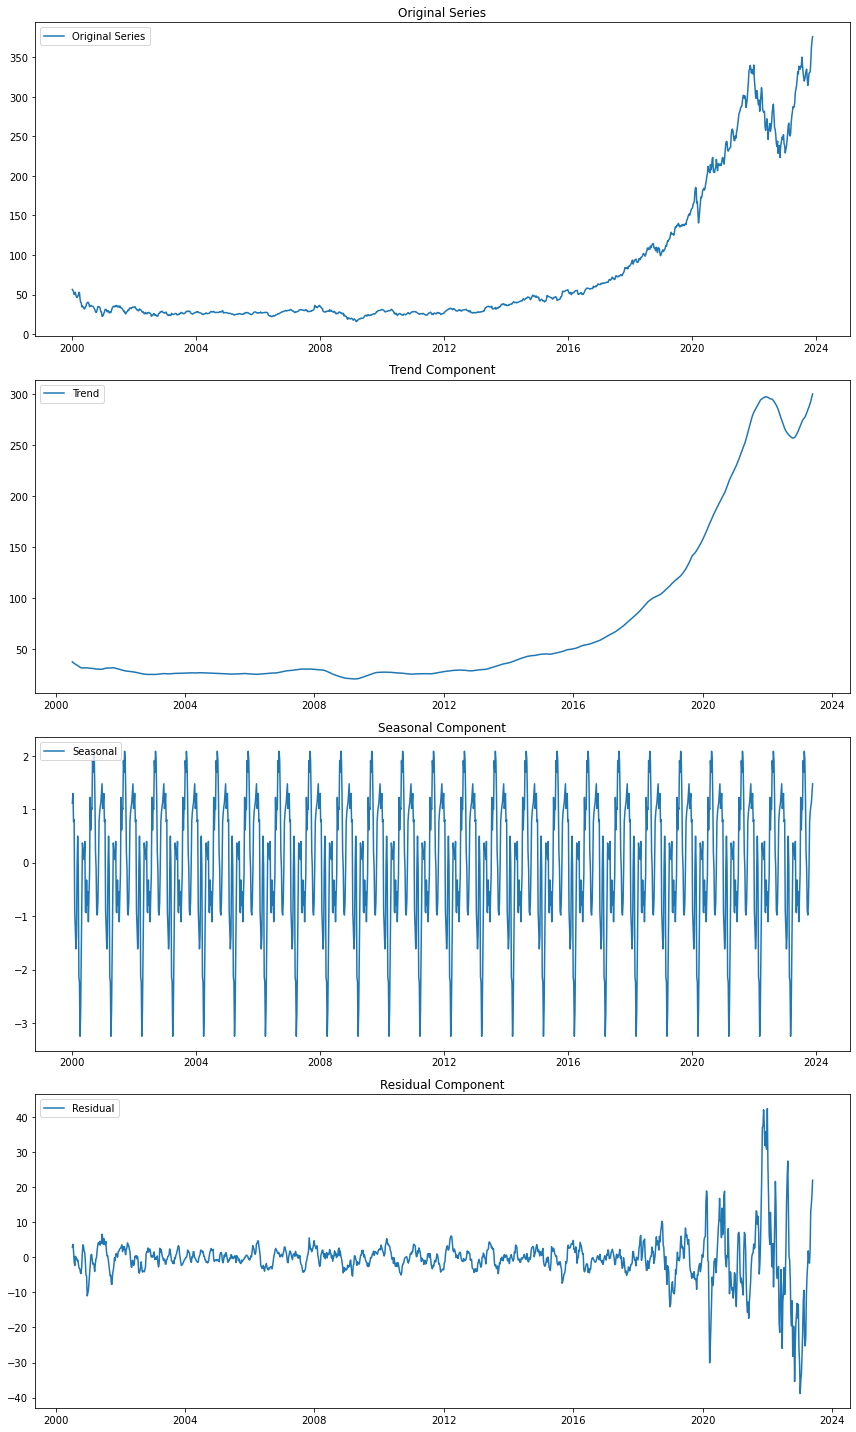

In [13]:
# Next, visualizes the 'Close' price as the Original Series, the Trend Series,
# the Seasonal Component, and the Residual Component

# Resample the data to a weekly frequency
resampled_df = df['Close'].resample('W-Fri').mean().dropna()

# Perform seasonal decomposition
result = sm.tsa.seasonal_decompose(resampled_df, period=52)  # assuming weekly data with an annual seasonality

# Plot the decomposition
plt.figure(figsize=(12, 20))

# Plot the Original Series
plt.subplot(4, 1, 1)
plt.plot(resampled_df, label='Original Series')
plt.legend()
plt.title('Original Series')

# Plot the Trend Component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()
plt.title('Trend Component')

# Plot the Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()
plt.title('Seasonal Component')

# Plot the Residual Component
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()
plt.title('Residual Component')

plt.tight_layout()
plt.show()

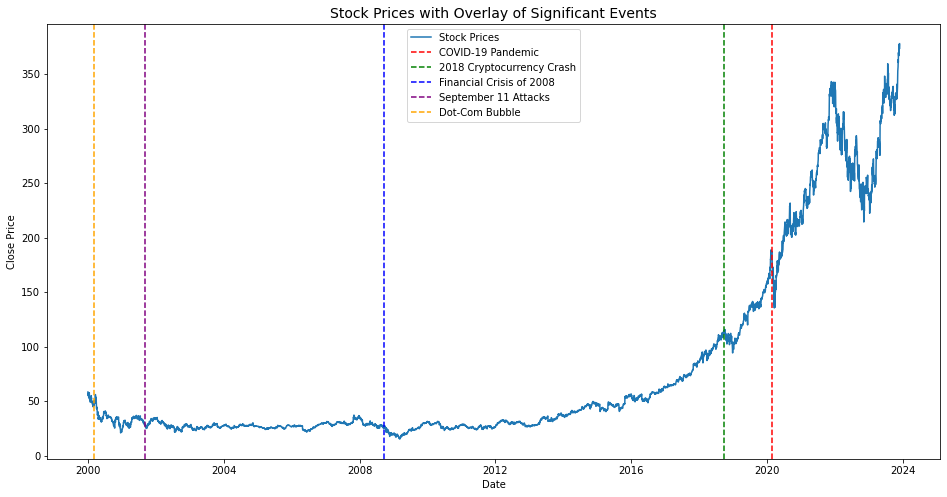

In [14]:
# Visualize how major events impacted the Stock Market (dates and info manually input and gathered from)
# https://en.wikipedia.org/wiki/List_of_stock_market_crashes_and_bear_markets

events = [
    {'date': '2020-02-24', 'event': 'COVID-19 Pandemic'},
    {'date': '2018-09-20', 'event': '2018 Cryptocurrency Crash'},
    {'date': '2008-09-16', 'event': 'Financial Crisis of 2008'},
    {'date': '2001-09-11', 'event': 'September 11 Attacks'},
    {'date': '2000-03-10', 'event': 'Dot-Com Bubble'},
]

# Convert the events dates to datetime datatype.
for event in events:
    event['date'] = pd.to_datetime(event['date'])

# Plot time series with overlay of events.
plt.figure(figsize=(16, 8))

# Plot stock prices.
sns.lineplot(x=df.index, y=df['Close'], label='Stock Prices')

# Define colors for each event.
event_colors = ['r', 'g', 'b', 'purple', 'orange']

# Overlay events on the plot with different colors.
for i, event in enumerate(events):
    plt.axvline(event['date'], color=event_colors[i], linestyle='--', label=event['event'])


plt.legend()
plt.title('Stock Prices with Overlay of Significant Events', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

## First Supervised Machine Learning Problem: Can we predict the closing price based on Linear Regression models?

The first model looks at predicting the closing price via a Linear Regression Model. From the EDA performed previously, there are a lot of columns that have signifcant correlation. The first section of models all represent linear regression models with different features utilized for predicting the closing price. The model first utilized features from all of the given columns (excluding 'Returns' which was later added). The second model then utilizes just the 'Open' price to predict the 'Close' price. The last model then utilizes just the 'Volume' to redict the 'Close' price. The first two models were selected to see how accurate the linear regression model is utilizing information that should obviously yield closing prices (based on correlation from EDA and the fact that the opening prices do not sway significantly day to day from the closing prices). The last model aims to predict the 'Close' price based on Volumes, which does not have high correlation, and would be less obvious as a predictor. 

### 1: Linear Regression - Predicting Closing Prices via All Given Features

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.589e+07
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:48:23   Log-Likelihood:                -4927.4
No. Observations:                4809   AIC:                             9867.
Df Residuals:                    4803   BIC:                             9906.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5265      0.037     14.123      0.0

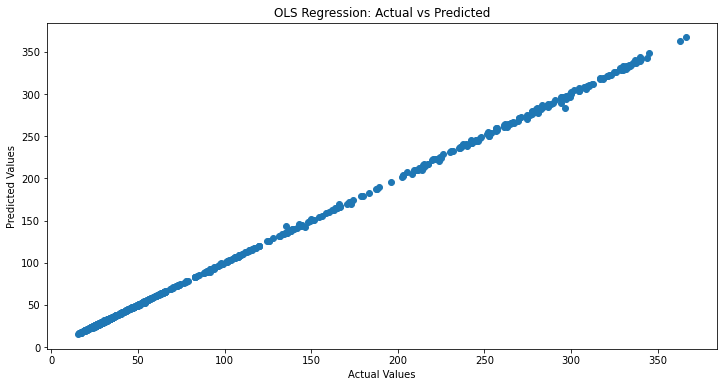

In [15]:
# Reset the dataframe back to original.
df = pd.read_csv('/Users/samshade/Downloads/MSFT(2000-2023).csv')
df['Date'] = pd.to_datetime(df['Date']) 
df['Returns'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Extract features (X) and target variable (y).
features = df[['Open', 'High', 'Low', 'Volume', 'Adj Close']]
target = df['Close']

# Add a constant term to the features (required for statsmodels).
features = sm.add_constant(features)

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Fit the OLS model.
model = sm.OLS(y_train, X_train).fit()

# Print the summary, including R-squared values for each predictor.
print(model.summary())

# Make predictions on the test set.
predictions = model.predict(X_test)

# Visualize predictions vs actual values.
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('OLS Regression: Actual vs Predicted')
plt.show()

In [16]:
# Evaluate the model via Mean Squared Error and the R-Squared value
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.6705461160223689
R-squared: 0.9999140837455149


### 2: Linear Regression - Predicting Closing Prices via Opening Prices

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.330e+07
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:48:23   Log-Likelihood:                -9225.1
No. Observations:                4809   AIC:                         1.845e+04
Df Residuals:                    4807   BIC:                         1.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0188      0.032     -0.590      0.5

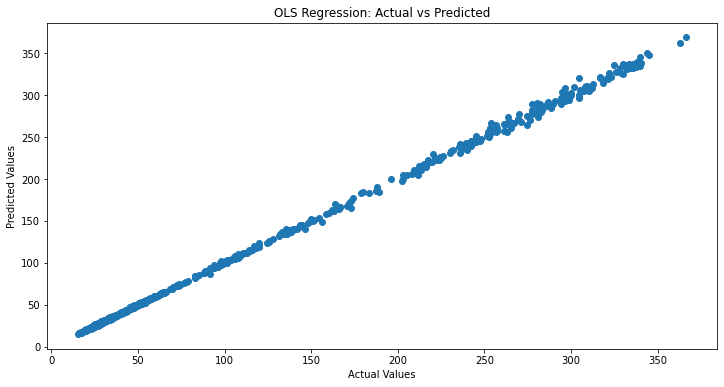

In [17]:
# Extract features (X) and target variable (y)
features = df['Open']
target = df['Close']

# Add a constant term to the features (required for statsmodels)
features = sm.add_constant(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Fit the OLS model
model = sm.OLS(y_train, X_train).fit()

# Print the summary, including R-squared values for each predictor
print(model.summary())

# Make predictions on the test set
predictions = model.predict(X_test)

# Visualize predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('OLS Regression: Actual vs Predicted')
plt.show()

In [18]:
# Evaluate the model via Mean Squared Error and the R-Squared value
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.198965666623634
R-squared: 0.9995901204380501


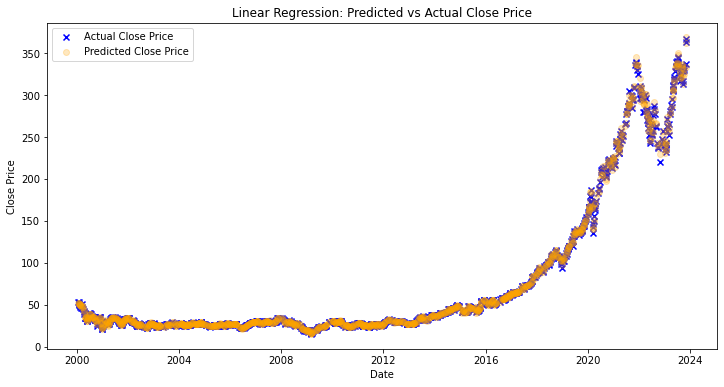

In [19]:
plt.figure(figsize=(12, 6))
plt.scatter(df.loc[X_test.index]['Date'], y_test, color='blue', marker = 'x', label='Actual Close Price')
plt.scatter(df.loc[X_test.index]['Date'], predictions, color='orange', alpha = 0.25, label='Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Linear Regression: Predicted vs Actual Close Price')
plt.legend()
plt.show()

### 3: Linear Regression - Predicting Closing Prices via Volume of Stock

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     954.5
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.48e-191
Time:                        20:48:23   Log-Likelihood:                -27848.
No. Observations:                4809   AIC:                         5.570e+04
Df Residuals:                    4807   BIC:                         5.571e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        135.5229      2.197     61.682      0.0

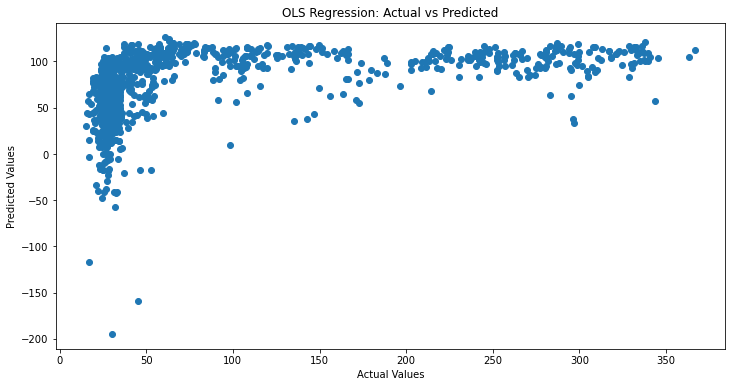

In [20]:
# Extract features (X) and target variable (y)
features = df['Volume']
target = df['Close']

# Add a constant term to the features (required for statsmodels)
features = sm.add_constant(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Fit the OLS model
model = sm.OLS(y_train, X_train).fit()

# Print the summary, including R-squared values for each predictor
print(model.summary())

# Make predictions on the test set
predictions = model.predict(X_test)

# Visualize predictions vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('OLS Regression: Actual vs Predicted')
plt.show()

In [21]:
# Evaluate the model via Mean Squared Error and the R-Squared value
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 6414.739616563931
R-squared: 0.17808725129737635


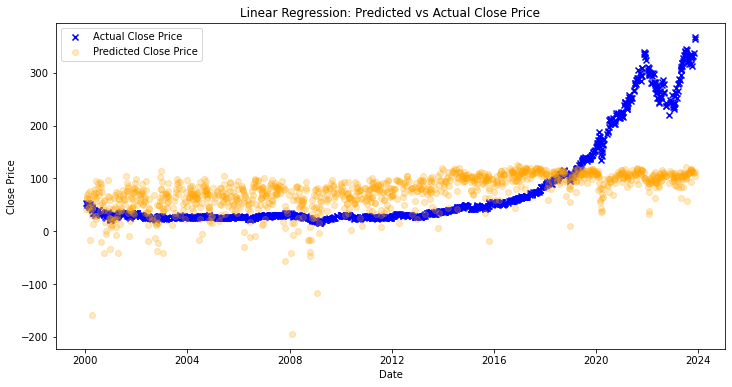

In [22]:
plt.figure(figsize=(12, 6))
plt.scatter(df.loc[X_test.index]['Date'], y_test, color='blue', marker = 'x', label='Actual Close Price')
plt.scatter(df.loc[X_test.index]['Date'], predictions, color='orange', alpha = 0.25, label='Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Linear Regression: Predicted vs Actual Close Price')
plt.legend()
plt.show()

## Second Supervised Machine Learning Problem: Can we predict a positive or negative return based on classification models? 

The next section examines the possibility of predicting a positive or negative return using various classification, supervised, machine learning models. The 'Returns' column was previously created, and represents a binary datatype that indicates whether a closing price will increase (1) or decrease (0) in the next time step. Four different classification models were developed to compare the results. The four different classification models utilized:

* Logistic Regression Model
* Support Vector Machine (SVM) Model
* Random Forest Model
* K-Nearest Neighbors (KNN) Model

The models were developed below, and the accuracy, confusion matrix, classification report, and Receiver Operating Characteristic Curve (ROC) with Area Under the Curve (AUC) were provided for each of the models. Being able to predict whether the Microsoft Stock has a positive or negative return can provide investors with a significant advantage in choosing when to invest.

### 1: Logistic Regression Model for Predicting Positive or Negative Returns

Accuracy: 0.5037406483790524
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.26      0.34       615
           1       0.50      0.76      0.60       588

    accuracy                           0.50      1203
   macro avg       0.51      0.51      0.47      1203
weighted avg       0.51      0.50      0.47      1203



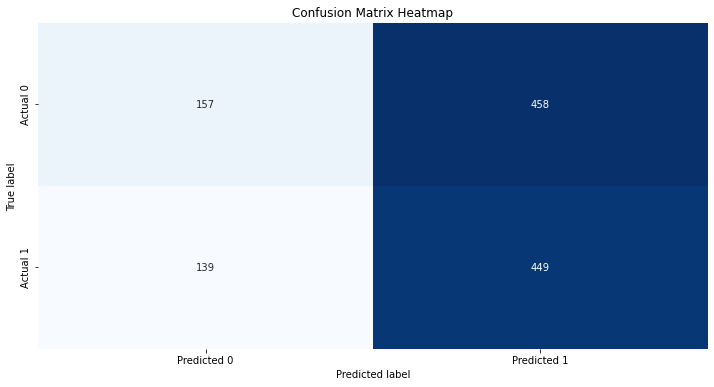

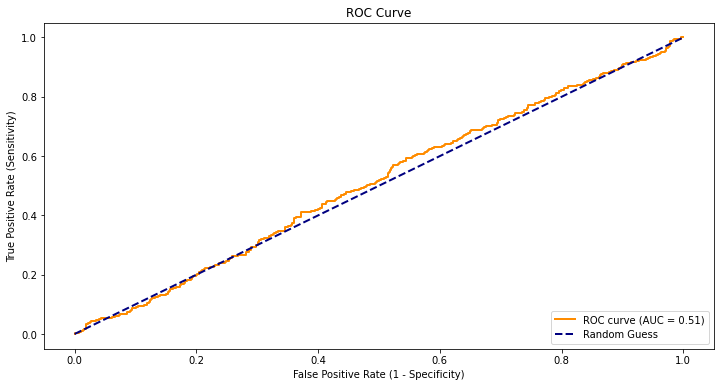

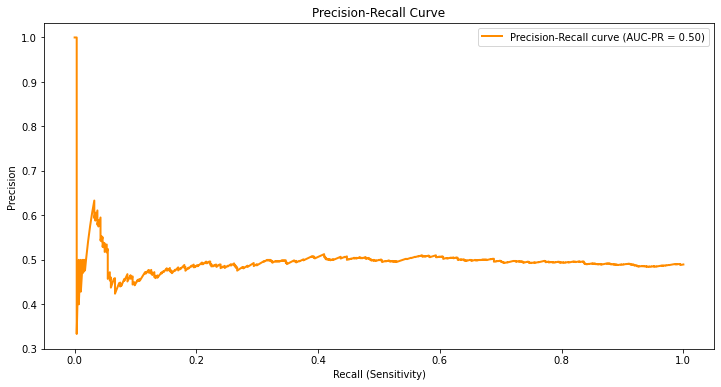

In [23]:
target_column = 'Returns'

# Extract features (X) and target variable (y)
features = df[['Open', 'High', 'Low', 'Volume', 'Adj Close']]
target = df[target_column]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# initialize and train the logistic regression model
model_log = LogisticRegression(random_state=42)
model_log.fit(X_train_scaled, y_train)

# make predictions on the test set
predictions = model_log.predict(X_test_scaled)

# evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

# confusion matrix heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# predict probabilities on the test set
probas = model_log.predict_proba(X_test_scaled)[:, 1]

# compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, probas)
roc_auc = auc(fpr, tpr)

# plot receiver operating characteristic (ROC) curve
plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test, probas)
auc_pr = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(12, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (AUC-PR = {auc_pr:.2f})')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

### 2: Support Vector Machine (SVM) Model for Predicting Positive and Negative Returns

Accuracy: 0.48212801330008315
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.04      0.07       615
           1       0.48      0.95      0.64       588

    accuracy                           0.48      1203
   macro avg       0.46      0.49      0.36      1203
weighted avg       0.45      0.48      0.35      1203



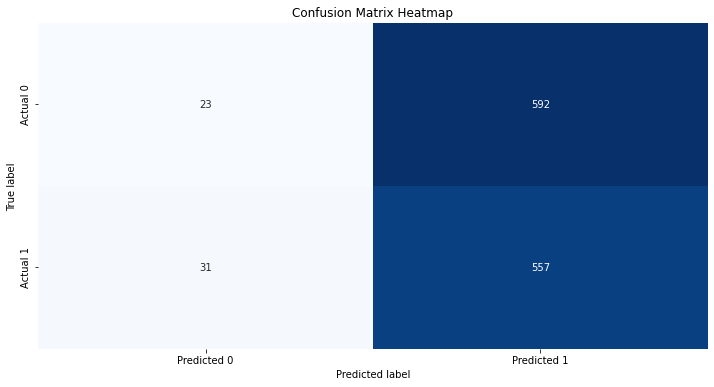

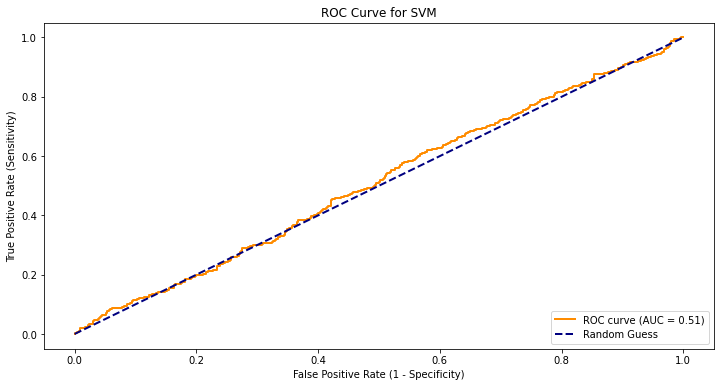

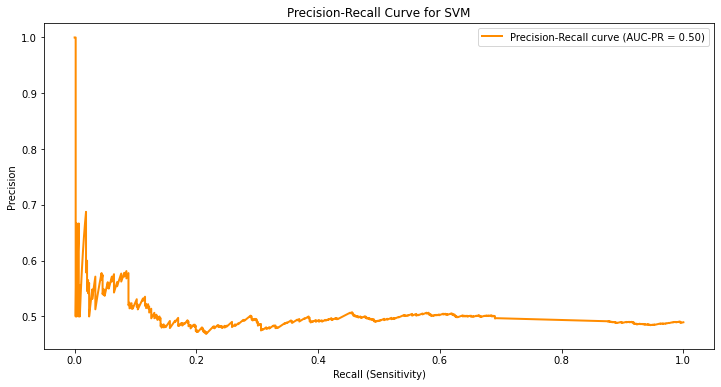

In [24]:
# Initialize and train the SVM model.
model_svm = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
model_svm.fit(X_train_scaled, y_train)

# Make predictions on the test set.
predictions_svm = model_svm.predict(X_test_scaled)

# Evaluate the model.
accuracy_svm = accuracy_score(y_test, predictions_svm)
conf_matrix_svm = confusion_matrix(y_test, predictions_svm)
classification_rep_svm = classification_report(y_test, predictions_svm)

print(f'Accuracy: {accuracy_svm}')
print(f'Classification Report:\n{classification_rep_svm}')

# Confusion matrix heatmap.
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Predict decision values on the test set.
decision_values_svm = model_svm.decision_function(X_test_scaled)

# Compute ROC curve and AUC.
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, decision_values_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot the ROC curve for SVM.
plt.figure(figsize=(12, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.show()

probas_svm = model_svm.predict_proba(X_test_scaled)[:, 1]

# Compute precision-recall curve and AUC-PR.
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_test, probas_svm)
auc_pr_svm = auc(recall_svm, precision_svm)

# Plot precision-recall curve for SVM.
plt.figure(figsize=(12, 6))
plt.plot(recall_svm, precision_svm, color='darkorange', lw=2, label=f'Precision-Recall curve (AUC-PR = {auc_pr_svm:.2f})')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM')
plt.legend(loc='upper right')
plt.show()

### 3: Random Forest Model for Predicting Positive and Negative Returns

Random Forest Accuracy: 0.5078969243557773
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.49      0.51       615
           1       0.50      0.52      0.51       588

    accuracy                           0.51      1203
   macro avg       0.51      0.51      0.51      1203
weighted avg       0.51      0.51      0.51      1203



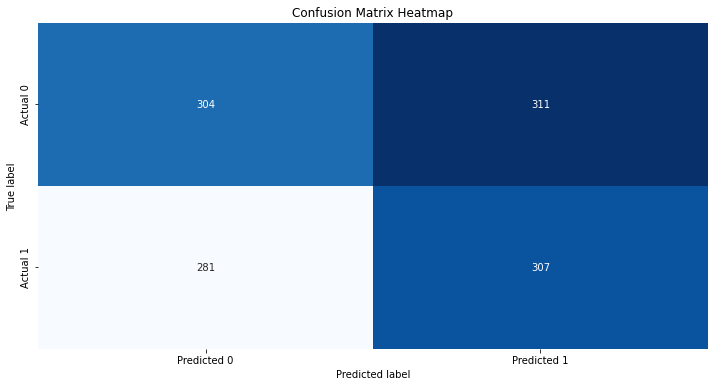

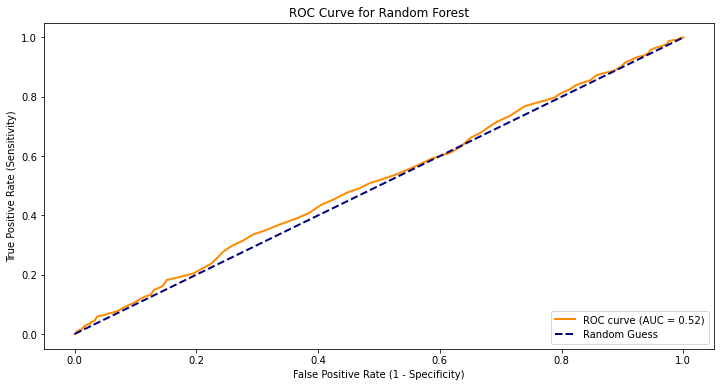

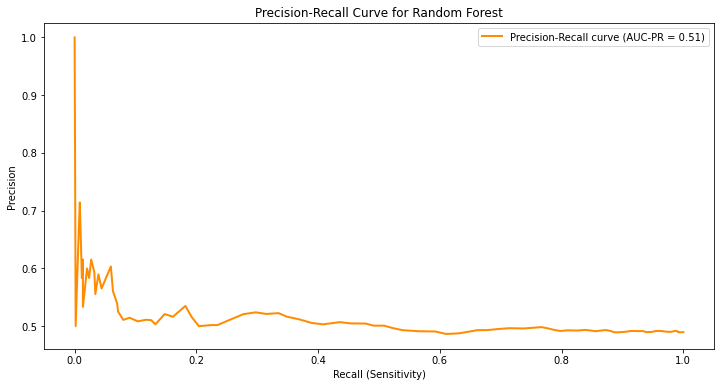

In [25]:
# Initialize and train the Random Forest model.
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Make predictions on the test set.
predictions_rf = model_rf.predict(X_test_scaled)

# Evaluate the model. 
accuracy_rf = accuracy_score(y_test, predictions_rf)
conf_matrix_rf = confusion_matrix(y_test, predictions_rf)
classification_rep_rf = classification_report(y_test, predictions_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest Classification Report:\n{classification_rep_rf}')

# Confusion matrix heatmap.
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Predict probabilities on the test set
probas_rf = model_rf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC.
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probas_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest.
plt.figure(figsize=(12, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

# Compute precision-recall curve and AUC-PR. 
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, probas_rf)
auc_pr_rf = auc(recall_rf, precision_rf)

# Plot precision-recall curve for Random Forest.
plt.figure(figsize=(12, 6))
plt.plot(recall_rf, precision_rf, color='darkorange', lw=2, label=f'Precision-Recall curve (AUC-PR = {auc_pr_rf:.2f})')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend(loc='upper right')
plt.show()

### 4: K-Nearest Neighbors (KNN) Model for Predicting Positive and Negative Returns

KNN Accuracy: 0.5278470490440565
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.49      0.51       615
           1       0.52      0.57      0.54       588

    accuracy                           0.53      1203
   macro avg       0.53      0.53      0.53      1203
weighted avg       0.53      0.53      0.53      1203



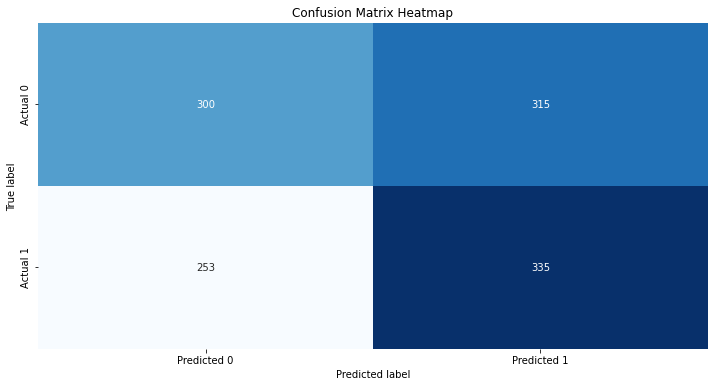

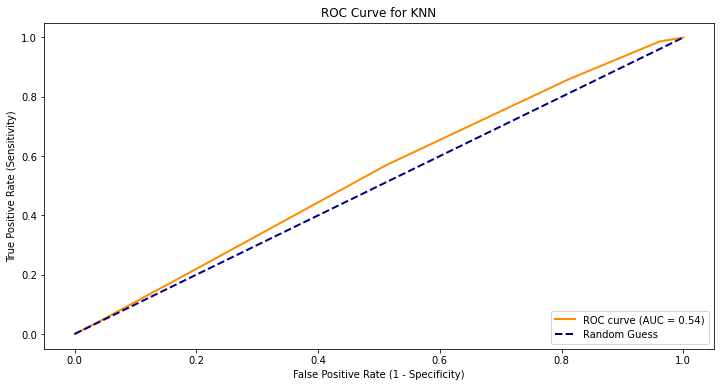

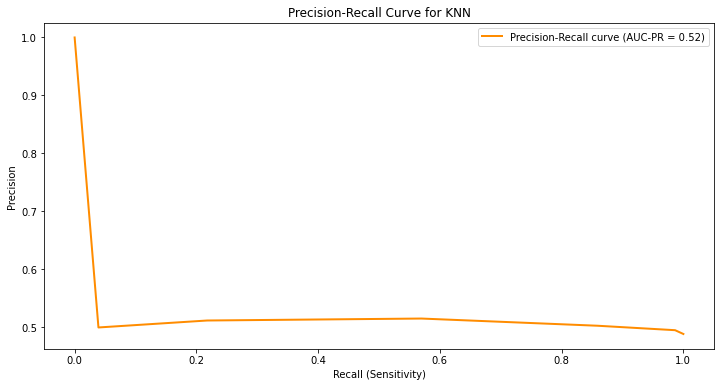

In [26]:
# Initialize and train the KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions_knn = model_knn.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, predictions_knn)
conf_matrix_knn = confusion_matrix(y_test, predictions_knn)
classification_rep_knn = classification_report(y_test, predictions_knn)

print(f'KNN Accuracy: {accuracy_knn}')
print(f'KNN Classification Report:\n{classification_rep_knn}')

# Confusion Matrix Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Predict probabilities on the test set using the same scaler
probas_knn = model_knn.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, probas_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve for KNN
plt.figure(figsize=(12, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()

# Compute precision-recall curve and AUC-PR
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, probas_knn)
auc_pr_knn = auc(recall_knn, precision_knn)

# plot precision-recall curve for KNN
plt.figure(figsize=(12, 6))
plt.plot(recall_knn, precision_knn, color='darkorange', lw=2, label=f'Precision-Recall curve (AUC-PR = {auc_pr_knn:.2f})')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for KNN')
plt.legend(loc='upper right')
plt.show()

### Conclusion

This project looks at how we can predict closing prices and positive/negative returns from the Microsoft Stock Data via supervised machine learning models such that investors have a leg-up on investing. The closing prices were predicted via three linear regression models:

* Predicting 'Close' via all given features ('Open', 'High', 'Low', 'Volume', 'Adj Close')
* Predicting 'Close' via just one feature with high correlation ('Open')
* Predicting 'Close' via just one feature with low correlation ('Volume')

The first two linear regression models yielded very positive results with a near R-squared value of 1.0 and a Mean Squared Error (MSE) of less than 1 for the model utilizing all given features and approximately 3.2 for the model utilizing just 'Open'. These models should yield accurate results as the values of stock prices during closing should not fluctuate significantly from the opening stock prices. Additionally, factors like 'Adj. Close' and 'High' and 'Low' would also show very little fluctuation; therefore, the models are not extremely helpful. The third model looks at predicting 'Close' via the 'Volume' of stocks sold. This showed a minimal correlation in the EDA, and any model yielding accurate results would be extremely beneficial to the investor. The results; however, were not accurate, which is not surprising. The model itself yielded a Mean Squared Error of around 6400 and an R-squared of around 0.178.

The positive/negative returns were predicted using binary classification methods. All four models struggled to predict positive or negative returns accurately. The models utilized for this project are described below.


**The Logistic Regression Model:**

- Precision: For class 0, it's 0.53, and for class 1, it's 0.50. These values indicate the proportion of true positive predictions among all positive predictions.

- Recall (Sensitivity): For class 0, it's 0.26, and for class 1, it's 0.76. These values indicate the proportion of true positive predictions among all actual positive instances.

- F1-score: For class 0, it's 0.34, and for class 1, it's 0.60.

- Accuracy: 0.50, indicating that the model correctly predicts the target variable in 50% of the instances.


**The Support Vector Machine Model:**

- Precision: For class 0, it's 0.43, and for class 1, it's 0.48. These values indicate the proportion of true positive predictions among all positive predictions.

- Recall (Sensitivity): For class 0, it's 0.04, and for class 1, it's 0.95. These values indicate the proportion of true positive predictions among all actual positive instances.

- F1-score: For class 0, it's 0.07, and for class 1, it's 0.64.

- Accuracy: 0.48, indicating that the model correctly predicts the target variable in 48% of the instances.


**The Random Forest Model:**

- Precision: For class 0, it's 0.52, and for class 1, it's 0.50. These values indicate the proportion of true positive predictions among all positive predictions.

- Recall (Sensitivity): For class 0, it's 0.49, and for class 1, it's 0.52. These values indicate the proportion of true positive predictions among all actual positive instances.

- F1-score: For both class 0 and class 1 it's 0.51.

- Accuracy: 0.51, indicating that the model correctly predicts the target variable in 51% of the instances.


**The K-Nearest Neighbors (KNN) Model:**

- Precision: For class 0, it's 0.54, and for class 1, it's 0.52. These values indicate the proportion of true positive predictions among all positive predictions.

- Recall (Sensitivity): For class 0, it's 0.49, and for class 1, it's 0.57. These values indicate the proportion of true positive predictions among all actual positive instances.

- F1-score: For class 0, it's 0.51, and for class 1, it's 0.54.

- Accuracy: 0.53, indicating that the model correctly predicts the target variable in 53% of the instances.


The success of these models indicates the difficulty in adequately predicting stock prices. 